# 1 The Momentum Product
*This section is not graded, and you do not need to submit your answers. But you are expected to consider these issues and be ready to discuss them.*
1. What is novel about the AQR Momentum product under construction compared to the various
momentum investment products already offered?
2. Name three reasons the momentum investment product will not exactly track the momentum
index, (ie. why the strategy will have tracking error.)
3. When constructing the momentum portfolio, AQR ranks stocks on their returns from month
t−12 through t−2. Why don’t they include the t−1 return in this ranking?


# 2 Investigating Momentum
In this section, we empirically investigate some concerns regarding AQR’s new momentum product.
On Canvas, find the data file, “momentum data.xlsx”.

* The first tab contains the momentum factor as an excess return: $r^{mom}$
* The second tab contains returns on portfolios corresponding to scored momentum deciles.
    - $r^{mom(1)}$ denotes the portfolio of stocks in the lowest momentum decile, the “losers” with the lowest past returns.
    - $r^{mom(10)}$ denotes the portfolio of stocks in the highest momentum decile.
* The third tab gives portfolios sorted by momentum and size.
    - $r^{momSU}$ denotes the portfolio of small stocks in the top 3 deciles of momentum scores.
    - $r^{momBD}$ denotes the portfolio of big-stocks in the bottom 3 deciles of momentum scores.

Note that the Fama-French momentum return, $r^{mom:FF}$ , given in the first tab, is constructed by FF as,
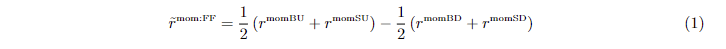


## 1. Is momentum still profitable?

The excess returns of lucrative trading strategies often disappear once the strategy is well-known. The first widely-cited paper on momentum was published in 1993. Have momentum returns or risk changed since then? The AQR case takes place at the end of 2008. Have momentum returns changed in 2009-2023?

Investigate by filling out the summary statistics below for the full-sample and three sub-samples.

(a) Using the data provided, fill in Table 1 with the appropriate stats for $r^{mom:FF}$

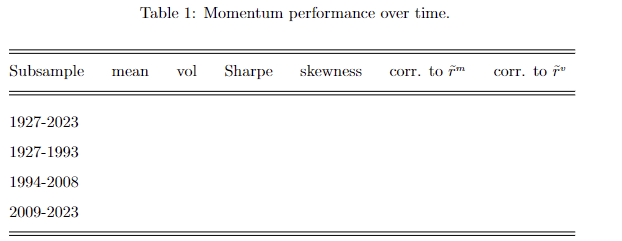



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import my_functions as mf

path = "../../data/momentum_data.xlsx"
raw_data = pd.read_excel(path,sheet_name = None)

sheets = list(raw_data.keys())

ff_factors = raw_data[sheets[1]].set_index('Date')
momentum = raw_data[sheets[2]].set_index('Date')
mom_deciles = raw_data[sheets[3]].set_index('Date')
tercile_port = raw_data[sheets[4]].set_index('Date')
rf = raw_data[sheets[5]].set_index('Date')

ff_factors['UMD'] = momentum['UMD']

In [2]:
np.corrcoef(ff_factors["UMD"], ff_factors["MKT"])[0,1]

-0.34428362548943725

In [3]:
end_periods = [["1927","2023"],["1927","1993"],["1994","2008"],["2009","2024"]]
result = pd.DataFrame()
for period in end_periods:
    ff_factors_period = ff_factors.loc[period[0]:period[1]]
    aux = mf.get_metric_returns(ff_factors_period[["UMD"]], adj_factor=12, VaR_q=0.05)[["Mean","Volatility","Sharpe_Ratio","Skew"]]
    aux["Corr mkt"] = np.corrcoef(ff_factors_period["UMD"], ff_factors_period["MKT"])[0,1]
    aux["Corr Value"] = np.corrcoef(ff_factors_period["UMD"], ff_factors_period["HML"])[0,1]
    aux.index = [period[0]+"-"+period[1]]
    result = pd.concat([result, aux])
result.style.format("{:.2%}")



,Mean,Volatility,Sharpe_Ratio,Skew,Corr mkt,Corr Value
1927-2023,7.47%,16.29%,45.84%,-298.56%,-34.59%,-40.57%
1927-1993,9.01%,16.00%,56.30%,-380.11%,-36.25%,-49.50%
1994-2008,10.44%,17.56%,59.45%,-57.72%,-23.45%,-12.94%
2009-2024,-1.51%,15.85%,-9.52%,-266.96%,-36.76%,-32.09%


(b) Has momentum changed much over time, as seen through these subsample statistics?

*Answer :*


(c) Does this data support AQR’s argument that momentum is an important piece of the ideal
portfolio? What if mean returns to momentum are in actuality near zero due to transaction
costs—would there still be evidence here that momentum is valuable?

## 2. The case is about whether a long-only implementation of momentum is valuable.

Construct your own long-only implementation:

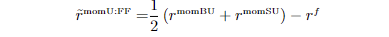

Note that this is following the FF approach of treating big and small stocks separately. This would be very similar to a scaled version of,

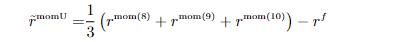

For the question below, use the FF-style, $r^{momU:FF}_t$ 

(a) Fill out Table 2 for the data in the period 1994-2023.

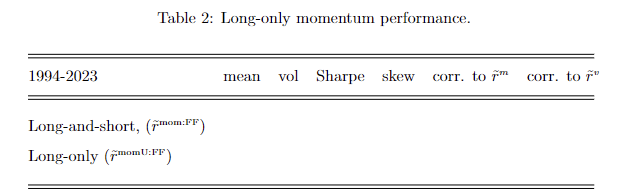


(b) Is long-only momentum as attractive as long-short momentum with respect to mean, volatility, and Sharpe Ratio?

(c) Is long-only momentum as diversifying as long-short momentum with respect to market and value premia?


(d) Show a plot of the cumulative product of 1 + $r^{mom:FF}$ and 1 +  $r^{momU:FF}$ over the 1994-2023 subsample

In [27]:
mom_long = (tercile_port["BIG HiPRIOR"] + tercile_port["SMALL HiPRIOR"])/2 - rf["RF"]
result = ff_factors[["UMD"]].copy()
result["Momentum_longOnly"] = mom_long
mf.get_metric_returns(result[result.index >= "1994-01-01"], adj_factor=12, VaR_q=0.05)[["Mean","Volatility","Sharpe_Ratio","Skew"]]
aux = mf.get_metric_returns(result[result.index >= "1994-01-01"], adj_factor=12, VaR_q=0.05)[["Mean","Volatility","Sharpe_Ratio","Skew"]]
aux["Corr mkt"] = result[result.index >= "1994-01-01"].corrwith(ff_factors[ff_factors.index >= "1994-01-01"]["MKT"])
aux["Corr Value"] =  result[result.index >= "1994-01-01"].corrwith(ff_factors[ff_factors.index >= "1994-01-01"]["HML"])
aux

c:\Users\josel\Documents\GitHub\finm-portfolio-2024\homework\my_homework\my_functions.py:61: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, aux_result], axis=0)
c:\Users\josel\Documents\GitHub\finm-portfolio-2024\homework\my_homework\my_functions.py:61: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, aux_result], axis=0)


,Mean,Volatility,Sharpe_Ratio,Skew,Corr mkt,Corr Value
UMD,0.043184,0.167682,0.257534,-1.440066,-0.306180,-0.215225
Momentum_longOnly,0.117195,0.178410,0.656885,-0.442992,0.903581,-0.118954


<Axes: xlabel='Date'>

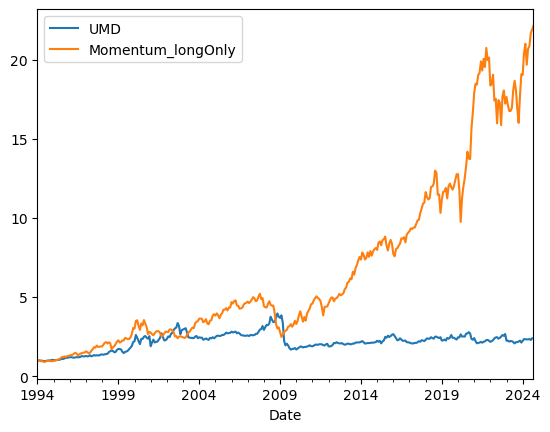

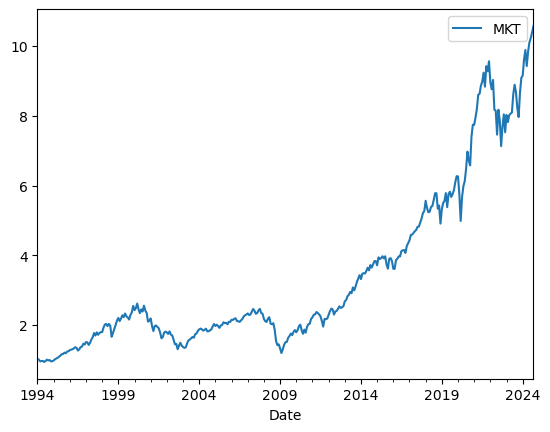

In [16]:
(1 + result[result.index >= "1994-01-01"]).cumprod().plot()
(1 + ff_factors[["MKT"]][ff_factors.index >= "1994-01-01"]).cumprod().plot()

### 2.3. Is momentum just data mining, or is it a robust strategy?

Assess how sensitive the threshold for the “winners” and “losers” is in the results. Specifically, we compare three constructions:

- long the top 1 decile and short the bottom 1 deciles:

$$ \tilde{r}^{momD1} = r^{mom(10)} - r^{mom(1)}$$

- long the top 3 deciles and short the bottom 3 deciles:


$$ 
\begin{aligned}
\tilde{r}^{momD3} &= \frac{1}{3}(r^{mom(8)} + r^{mom(9)} + r^{mom(10)}) - \frac{1}{3} (r^{mom(3)} + r^{mom(2)} + r^{mom(1)})\\
&= \frac{1}{3}\sum_{k = 8}^{10} r^{mom(k)} - \frac{1}{3}\sum_{k = 1}^{3} r^{mom(k)} 
\end{aligned}$$


- long the top 5 deciles and short the bottom 5 decile:

$$ \tilde{r}^{momD5} = \frac{1}{5}\sum_{k = 6}^{10} r^{mom(k)} - \frac{1}{5}\sum_{k = 1}^{5} r^{mom(k)} $$

#### (a) Compare all three constructions, (in the full-sample period,) by filling out the stats in the table below for the period 1994-2023.

$$
\begin{equation}
\begin{aligned}
&\text { Table 3: Robustness of momentum construction. }\\
&\begin{array}{lllllll}
\hline \hline \text { 1994-2023 } \quad \text { mean } & \text { vol } & \text { Sharpe } & \text { skewness } & \text { corr. to } \tilde{r}^m & \text { corr. to } \tilde{r}^v \\
\hline \hline \tilde{r}^{\text {momD1 }} & & & & & \\
\tilde{r}^{\text {momD3 }} & & & & \\
\tilde{r}^{\text {momD5 }} & & & & \\
\hline \hline
\end{array}
\end{aligned}
\end{equation}
$$

In [17]:
mom_deciles.columns

Index(['Lo PRIOR', 'PRIOR 2', 'PRIOR 3', 'PRIOR 4', 'PRIOR 5', 'PRIOR 6',
       'PRIOR 7', 'PRIOR 8', 'PRIOR 9', 'Hi PRIOR'],
      dtype='object')

In [20]:
analysis = ff_factors[["UMD"]].copy()
analysis["Top1"] = mom_deciles['Hi PRIOR'] - mom_deciles['Lo PRIOR']
analysis["Top3"] = (1/3)*(mom_deciles['Hi PRIOR'] + mom_deciles['PRIOR 9'] + mom_deciles['PRIOR 8']) - (1/3)*(mom_deciles['Lo PRIOR'] + mom_deciles['PRIOR 2'] + mom_deciles['PRIOR 3'])
analysis["Top5"] = (1/5)*(mom_deciles['Hi PRIOR'] + mom_deciles['PRIOR 9'] + mom_deciles['PRIOR 8'] + mom_deciles['PRIOR 7'] + mom_deciles['PRIOR 6']) - (1/5)*(mom_deciles['Lo PRIOR'] + mom_deciles['PRIOR 2'] + mom_deciles['PRIOR 3'] + mom_deciles['PRIOR 4'] + mom_deciles['PRIOR 5'])

,Mean,Volatility,Sharpe_Ratio,Skew,Corr mkt,Corr Value
UMD,0.043184,0.167682,0.257534,-1.440066,-0.306180,-0.215225
Top1,0.082010,0.299035,0.274248,-1.299319,-0.319715,-0.233463
Top3,0.028551,0.193383,0.147638,-1.339529,-0.361659,-0.211472
Top5,0.016411,0.133990,0.122480,-1.410163,-0.348584,-0.212234


<Axes: xlabel='Date'>

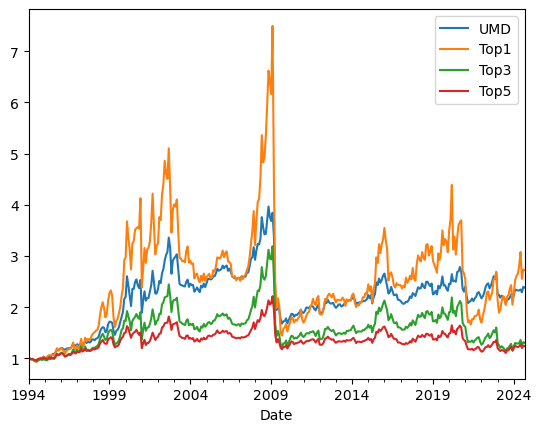

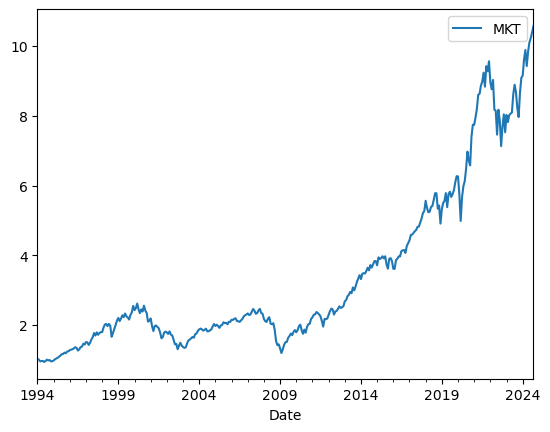

In [23]:
aux = mf.get_metric_returns(analysis[analysis.index >= "1994-01-01"], adj_factor=12, VaR_q=0.05)[["Mean","Volatility","Sharpe_Ratio","Skew"]]
aux["Corr mkt"] = analysis[analysis.index >= "1994-01-01"].corrwith(ff_factors[ff_factors.index >= "1994-01-01"]["MKT"])
aux["Corr Value"] =  analysis[analysis.index >= "1994-01-01"].corrwith(ff_factors[ff_factors.index >= "1994-01-01"]["HML"])
display(aux)

(1 + analysis[analysis.index >= "1994-01-01"]).cumprod().plot()
(1 + ff_factors[["MKT"]][ff_factors.index >= "1994-01-01"]).cumprod().plot()

### 2.4. Does implementing momentum require trading lots of small stocks-- thus causing even larger trading costs?

For regulatory and liquidity reasons, AQR is particularly interested in using larger stocks for their momentum baskets. (Though they will launch one product that focuses on medium-sized stocks.)

Use the data provided on both small-stock “winners”, $r^{momSU}$, and small-stock “losers”, $r^{momSD}$, to construct a small-stock momentum portfolio,

$$ r^{momS}_t = r^{momSU}_t - r^{momSD}_t $$

Similarly, use the data provided to construct a big-stock momentum portfolio,

$$ r^{momB}_t = r^{momBU}_t − r^{momBD}_t $$

#### (a) Fill out Table 4 over the sample 1994-2023.

$$
\begin{equation*}
\begin{aligned}
&\text { Table 4: Momentum of small and big stocks. }\\
&\begin{array}{llllll}
\hline \hline \text { 1994-2023 } & \text { mean } & \text { vol } & \text { Sharpe } & \text { skewness } & \text { corr. to } \tilde{r}[m] \\
\hline \hline \text { All stocks, } \tilde{r}^{\text {mom:FF }} & & & & \\
\text { Small stocks } r_t^{\text {mom } S} & & & \\
\text { Large stocks } r_t^{\text {mom } B} & & & \\
\hline
\end{array}
\end{aligned}
\end{equation*}
$$

,Mean,Volatility,Sharpe_Ratio,Skew,Corr mkt,Corr Value
UMD,0.043184,0.167682,0.257534,-1.440066,-0.344284,-0.406410
Big,0.023177,0.182458,0.127028,-0.875536,-0.324900,-0.386341
Small,0.063200,0.169633,0.372569,-1.756472,-0.331534,-0.388244


<Axes: xlabel='Date'>

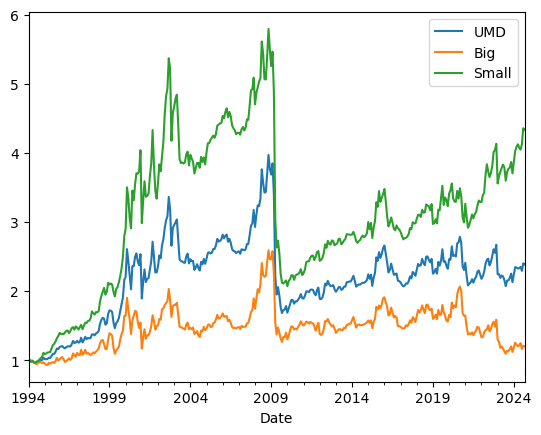

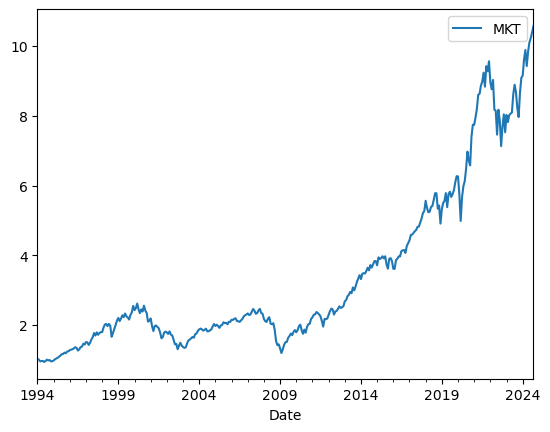

In [43]:
mom_big = (tercile_port["BIG HiPRIOR"] - tercile_port["BIG LoPRIOR"])
mom_small = (tercile_port["SMALL HiPRIOR"] - tercile_port["SMALL LoPRIOR"])

result = ff_factors[["UMD"]].copy()
result["Big"] = mom_big
result["Small"] = mom_small
aux = mf.get_metric_returns(result[result.index >= "1994-01-01"], adj_factor=12, VaR_q=0.05)[["Mean","Volatility","Sharpe_Ratio","Skew"]]
aux["Corr mkt"] = result.corrwith(ff_factors["MKT"])
aux["Corr Value"] =  result.corrwith(ff_factors["HML"])
display(aux)

(1 + result[result.index >= "1994-01-01"]).cumprod().plot()
(1 + ff_factors[["MKT"]][ff_factors.index >= "1994-01-01"]).cumprod().plot()